In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [4]:
#Your first requirement is to create a series of scatter plots to 
#showcase the following relationships:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

In [5]:
#1) I need to first draw from the url api to create dictionaries for each variable

url = "http://api.openweathermap.org/data/2.5/weather?"

temp = []
lats = []
lngs = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
date = []
country = []


In [6]:
#2) Create for statement to query city weather from api

for city in cities:
    time.sleep(1.01)
    try:
        query_city = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        response = requests.get(query_city)
        response = response.json()
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        

    except KeyError: 
        print("city not found")
        

        
#print(query_city)

city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found


In [8]:
#3) Create dataframe of using my created dictionaries

weather_df = pd.DataFrame({"City": city_name,
                           "Temperature (F)": temp,
                           "Humidity (%)": humidity,
                           "Cloudiness (%)": cloudiness,
                           "Wind Speed (mph)": wind_speed,
                           "Latitude": lats,
                           "Longitude": lngs
                           
                          })
output = weather_df.to_csv("WeatherPy.csv")

weather_df

,City,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
0,Qaanaaq,10.58,84,100,7.31,77.48,-69.36
1,Klaksvík,41.00,86,13,27.51,62.23,-6.59
2,Port Alfred,70.70,75,21,17.36,-33.59,26.89
3,Khāsh,73.54,14,0,12.12,28.22,61.22
4,Dikson,10.04,95,12,7.47,73.51,80.55
...,...,...,...,...,...,...,...
562,Progreso,73.18,73,40,4.70,21.28,-89.67
563,Sabang,82.92,73,63,6.13,5.89,95.32
564,Plouzané,44.60,87,24,4.70,48.38,-4.62
565,Sambava,79.20,58,13,10.02,-14.27,50.17


<AxesSubplot:title={'center':'Temperature vs. Latitude'}, xlabel='Latitude', ylabel='Temperature (F)'>

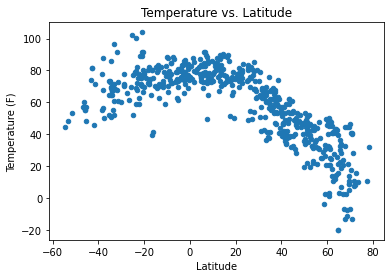

In [9]:
weather_df.plot(kind="scatter", x="Latitude", y="Temperature (F)", title="Temperature vs. Latitude")

<AxesSubplot:title={'center':'Humidity vs. Latitude'}, xlabel='Latitude', ylabel='Humidity (%)'>

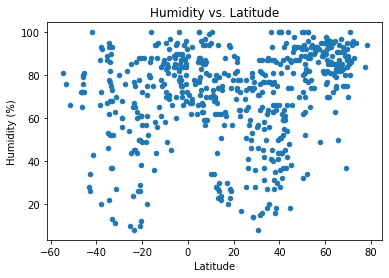

In [10]:
weather_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", title="Humidity vs. Latitude")

<AxesSubplot:title={'center':'Cloudiness vs. Latitude'}, xlabel='Latitude', ylabel='Cloudiness (%)'>

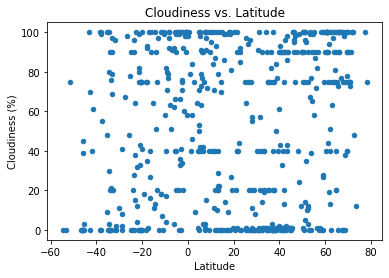

In [11]:
weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", title="Cloudiness vs. Latitude")

<AxesSubplot:title={'center':'Wind Speed vs. Latitude'}, xlabel='Latitude', ylabel='Wind Speed (mph)'>

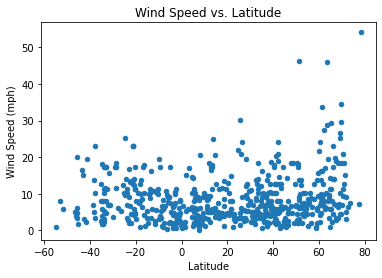

In [12]:
weather_df.plot(kind="scatter", x="Latitude", y="Wind Speed (mph)", title="Wind Speed vs. Latitude")

In [13]:
north_df = weather_df.loc[weather_df["Latitude"]>0, :]
south_df = weather_df.loc[weather_df["Latitude"]<0, :]

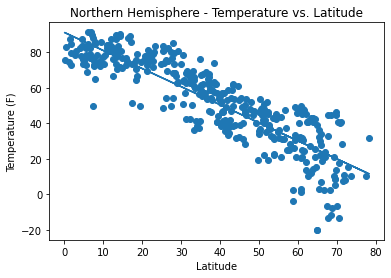

In [14]:
#Northern Hemisphere - Create scatter plot of Temp. vs. Lat. with linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(north_df["Latitude"], north_df["Temperature (F)"])
x = north_df["Latitude"]
regressvalues = slope*x+intercept
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.plot(x,regressvalues)
plt.scatter(x,north_df["Temperature (F)"])
plt.show()

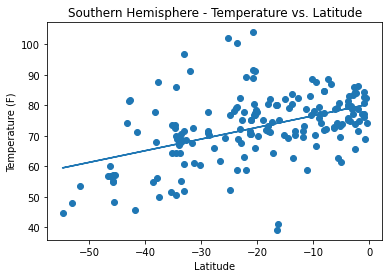

80.4410688866042


In [15]:
#Southern Hemisphere - Create scatter plot of Temp. vs. Lat. with linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(south_df["Latitude"], south_df["Temperature (F)"])
x = south_df["Latitude"]
regressvalues = slope*x+intercept
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.plot(x,regressvalues)
plt.scatter(x,south_df["Temperature (F)"])
plt.show()
print(intercept)

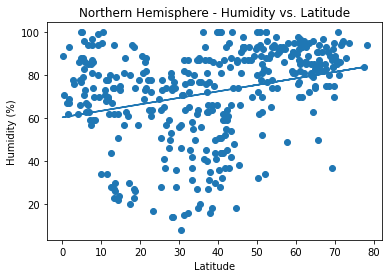

In [16]:
#Northern Hemisphere - Create scatter plot of Humid. vs. Lat. with linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(north_df["Latitude"], north_df["Humidity (%)"])
x = north_df["Latitude"]
regressvalues = slope*x+intercept
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.plot(x,regressvalues)
plt.scatter(x,north_df["Humidity (%)"])
plt.show()

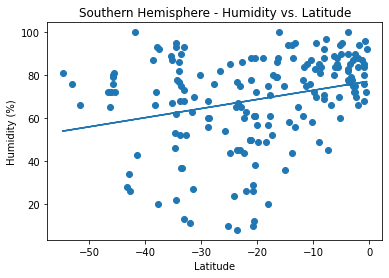

In [17]:
#Southern Hemisphere - Create scatter plot of Humid. vs. Lat. with linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(south_df["Latitude"], south_df["Humidity (%)"])
x = south_df["Latitude"]
regressvalues = slope*x+intercept
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.plot(x,regressvalues)
plt.scatter(x,south_df["Humidity (%)"])
plt.show()

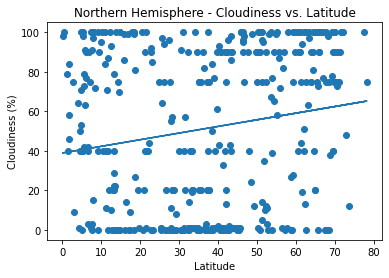

In [18]:
#Northern Hemisphere - Create scatter plot of Cloud vs. Lat. with linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(north_df["Latitude"], north_df["Cloudiness (%)"])
x = north_df["Latitude"]
regressvalues = slope*x+intercept
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.plot(x,regressvalues)
plt.scatter(x,north_df["Cloudiness (%)"])
plt.show()

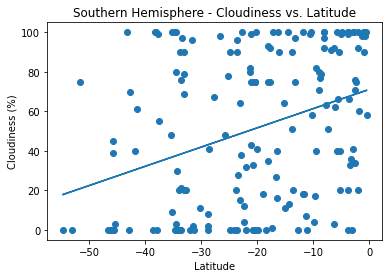

In [19]:
#Southern Hemisphere - Create scatter plot of Cloud vs. Lat. with linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(south_df["Latitude"], south_df["Cloudiness (%)"])
x = south_df["Latitude"]
regressvalues = slope*x+intercept
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.plot(x,regressvalues)
plt.scatter(x,south_df["Cloudiness (%)"])
plt.show()

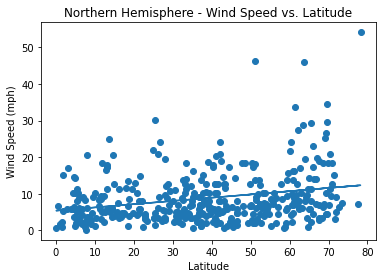

In [25]:
#Northern Hemisphere - Create scatter plot of Temp. vs. Lat. with linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(north_df["Latitude"], north_df["Wind Speed (mph)"])
x = north_df["Latitude"]
regressvalues = slope*x+intercept
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.plot(x,regressvalues)
plt.scatter(x,north_df["Wind Speed (mph)"])
plt.show()

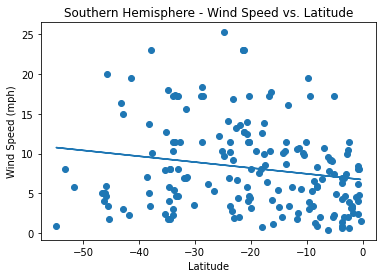

In [26]:
#Southern Hemisphere - Create scatter plot of Wind Speed vs. Lat. with linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(south_df["Latitude"], south_df["Wind Speed (mph)"])
x = south_df["Latitude"]
regressvalues = slope*x+intercept
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.plot(x,regressvalues)
plt.scatter(x,south_df["Wind Speed (mph)"])
plt.show()